# Homework 12

https://scikit-learn.org/0.15/modules/scaling_strategies.html#incremental-learning

* Implement a mini batch functionality to train a regressor.
    - (Optional) If anyone want to do this in a pipeline can do this: https://koaning.github.io/tokenwiser/api/pipeline.html

* Save model, load the model again and test it on `X_test` __Do NOT commit the pickle file__

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def test_df():
    df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

    df = df.sample(5000, random_state=100).reset_index(drop=True)
    
    y = df['sellingprice']
    df.drop('sellingprice', axis=1, inplace=True)
    X = df
    
    return X,y

def partial_df():
    df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)
   
    while(True):
        yield df.sample(100).reset_index(drop=True)
        
gen = partial_df()

In [43]:
df.shape

(558837, 16)

In [44]:
X_test, y_test = test_df()

In [48]:
# each time you call this you will get a new slice of the dataframe.
data=next(gen)

In [49]:
data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2011,Cadillac,Escalade ESV,Luxury,SUV,automatic,1gys4hefxbr121958,tx,4.9,74921.0,silver,black,texas rv outlet superstore,30700,30000,Wed Feb 18 2015 02:20:00 GMT-0800 (PST)
1,2014,Nissan,Pathfinder,S,SUV,automatic,5n1ar2mn8ec678184,tn,4.5,23980.0,—,black,nissan north america inc.,20200,20600,Wed Jun 17 2015 03:30:00 GMT-0700 (PDT)
2,2007,BMW,3 Series,328i,Sedan,automatic,wbava33507kx81982,fl,2.9,77534.0,beige,tan,coggin deland ford,9275,9600,Wed Feb 25 2015 01:25:00 GMT-0800 (PST)
3,2013,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et9dfb77330,mi,4.4,26093.0,white,gray,automobiles paille inc,26900,26500,Thu Jan 29 2015 01:30:00 GMT-0800 (PST)
4,2013,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcgxdr685312,ca,2.1,61178.0,blue,black,the hertz corporation,11550,10900,Tue May 26 2015 05:30:00 GMT-0700 (PDT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011,Lexus,LX 570,Base,SUV,automatic,jtjhy7ax9b4057015,tx,3.8,90339.0,red,tan,huffines chrysler jeep dodge lewisville,40700,38300,Thu May 21 2015 04:00:00 GMT-0700 (PDT)
96,2014,NaN,NaN,NaN,NaN,NaN,1c4njrabxed779978,on,4.7,15742.0,gray,black,fca canada inc,17000,16700,Tue Jun 02 2015 05:00:00 GMT-0700 (PDT)
97,2011,Mercedes-Benz,S-Class,S550 4MATIC,Sedan,automatic,wddng8gb9ba411228,fl,3.8,41367.0,gray,black,braman honda of palm beach,37400,38000,Thu Jan 15 2015 01:40:00 GMT-0800 (PST)
98,2014,Mazda,CX-9,Touring,SUV,automatic,jm3tb2ca4e0431236,tn,3.5,37464.0,white,tan,avis corporation,20700,20900,Wed Mar 04 2015 02:30:00 GMT-0800 (PST)


In [50]:
data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

## Implementing mini batch functionality

In [51]:
num_vars=['year','odometer']
cat_vars=['make','model','trim','body','transmission','state','color','interior','seller','saledate','vin','condition','mmr']

In [52]:
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor

label_encoder = preprocessing.LabelEncoder()

#Initializing the model
sgd_lm = SGDRegressor(fit_intercept=False, alpha=0, eta0=0.01, power_t=.05, learning_rate='adaptive')


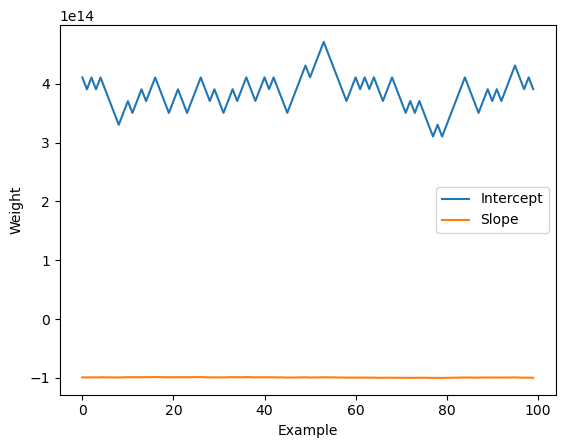

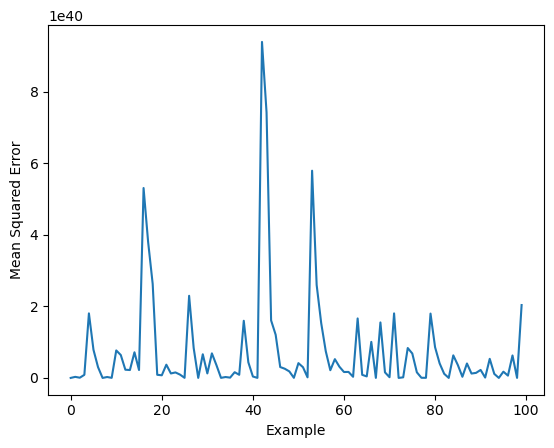

In [61]:
n_epochs=5000

for epoch in range(n_epochs):
    data=next(gen)
    
    # Initializing X and y
    y = data['sellingprice']
    data.drop('sellingprice', axis=1, inplace=True)
    X = data
    
    #Creating dummies for categorical variables
    for feature in cat_vars:
        X[feature] = label_encoder.fit_transform(X[feature])
    X.fillna(0,inplace=True)
    
    samples = X.shape[0]

    coefs = list()
    mses = list()

    for i in range(samples):
        sgd_lm = sgd_lm.partial_fit(X[i:i+1], y[i:i+1].ravel())

        b = sgd_lm.coef_[0]
        m = sgd_lm.coef_[1]
        coefs.append((b, m))

        yhat = sgd_lm.predict(X)
        mse = ((y - yhat)**2).mean()
        mses.append(mse)

plt.plot(range(samples), [x[0] for x in coefs])
plt.plot(range(samples), [x[1] for x in coefs])
plt.legend(['Intercept', 'Slope'])
plt.xlabel('Example')
plt.ylabel('Weight')
plt.show()

plt.plot(range(samples), mses)
plt.xlabel('Example')
plt.ylabel('Mean Squared Error')
plt.show()

In [62]:
for feature in cat_vars:
    X_test[feature] = label_encoder.fit_transform(X_test[feature])

In [63]:
X_test.fillna(0,inplace=True)

## Saving the model

In [64]:
import joblib

joblib.dump(sgd_lm, 'pipeline.pkl')

['pipeline.pkl']

## Loading the model again and testing on test data

In [65]:
pipeline = joblib.load('pipeline.pkl')
pipeline

SGDRegressor(alpha=0, fit_intercept=False, learning_rate='adaptive',
             power_t=0.05)

In [66]:
Y_predicted = pipeline.predict(X_test)

In [67]:
from sklearn.metrics import mean_squared_error
import math
print("Mean Squared Error(MSE):", mean_squared_error(y_test, Y_predicted))
print("Root Mean Squared Error(RMSE): ", math.sqrt(mean_squared_error(y_test, Y_predicted)))

Mean Squared Error(MSE): 1.681220453814102e+40
Root Mean Squared Error(RMSE):  1.2966188544881268e+20


In [68]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error(MAE):", mean_absolute_error(y_test, Y_predicted))

Mean Absolute Error(MAE): 1.0222457141004614e+20
